In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CNN autoL2
df1 = pd.read_csv('./result/01_1e-5.csv')
df2 = pd.read_csv('./result/01_5e-4.csv')
df3 = pd.read_csv('./result/01_1e-4.csv')
df4 = pd.read_csv('./result/01_autoL2.csv')
# df.head()

# CNN autoL2 with batch normalization
bn_df1 = pd.read_csv('./result/02_bn_1e-05.csv')
bn_df2 = pd.read_csv('./result/02_bn_5e-04.csv')
bn_df3 = pd.read_csv('./result/02_bn_1e-04.csv')
bn_df4 = pd.read_csv('./result/02_bn_autoL2.csv')

# CNN autoL2 with percentage modification
pct5_df1 = pd.read_csv('./result/03_autoL2_by5pctg.csv')
pct5_df2 = pd.read_csv('./result/03_autoL2_by5pctg_bn.csv')
pct10_df1 = pd.read_csv('./result/03_autoL2_by10pctg.csv')
pct10_df2 = pd.read_csv('./result/03_autoL2_by10pctg_bn.csv')

# CNN autoL2 with increase/decrease lambda
adv_df1 = pd.read_csv('./result/04_AdvanceL2.csv')
adv_df2 = pd.read_csv('./result/04_AdvanceL2_bn.csv')

# exactly the same as those above, second attempt
adv_df1c = pd.read_csv('./result/04_AdvanceL2_attempt2.csv')
adv_df2c = pd.read_csv('./result/04_AdvanceL2_bn_attempt2.csv')

# CNN autoL2 with increase/decrease lambda plus percentage modification
adv_5_df1 = pd.read_csv('./result/05_AdvanceL2_by5pctg.csv')
adv_5_df2 = pd.read_csv('./result/05_AdvanceL2_by5pctg_bn.csv')

In [92]:
batch_size = 128
batch_num = int(50000/batch_size) +1
print(batch_num)

391


In [103]:
def plot_acc_and_lambda(input_df1, input_df2, input_df3, input_df4, title, legend, batch_num):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
    
    epochs = [e for e in range(1, 201)]
    epoch_steps = []
    
    acc_df1 = acc_plot_preparation(input_df1, batch_num)
    acc_df2 = acc_plot_preparation(input_df2, batch_num)
    acc_df3 = acc_plot_preparation(input_df3, batch_num)
    acc_df4 = acc_plot_preparation(input_df4, batch_num)
    
    ax1.plot(epochs,
             acc_df1,
             linestyle = '-',
             linewidth = 1,
             color = 'black',
            )
    ax1.plot(epochs,
             acc_df2,
             linestyle = '-',
             linewidth = 1,
             color = 'red',
            )
    ax1.plot(epochs,
             acc_df3,
             linestyle = '-',
             linewidth = 1,
             color = 'blue',
            )
    ax1.plot(epochs,
             acc_df4,
             linestyle = '-',
             linewidth = 1,
             color = 'green',
            )
    ax1.set(xlabel='Epochs', ylabel='Test accuracy')
    ax1.legend(legend)
    
    df1 = lambda_plot_preparation(input_df1, batch_num)
    df2 = lambda_plot_preparation(input_df2, batch_num)
    df3 = lambda_plot_preparation(input_df3, batch_num)
    df4 = lambda_plot_preparation(input_df4, batch_num)

    ax2.plot(df1['epoch_steps'],
             df1['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'black',
            )
    ax2.plot(df2['epoch_steps'],
             df2['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'red',
            )
    ax2.plot(df3['epoch_steps'],
             df3['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'blue',
            )
    ax2.plot(df4['epoch_steps'],
             df4['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'green',
            )

    ax2.set(xlabel='Epochs', ylabel='Lambda',  yscale='log', xscale='log')
    ax2.legend(legend)
    fig.suptitle(title)
    
def acc_plot_preparation(my_df, N):
    return np.array(my_df[my_df['steps']==N-1]['test_acc']/100)

def lambda_plot_preparation(my_df, N):
    my_df['epoch_steps'] = my_df['epochs'] + my_df['steps']/N
    return my_df

# Original setup in paper - CNN

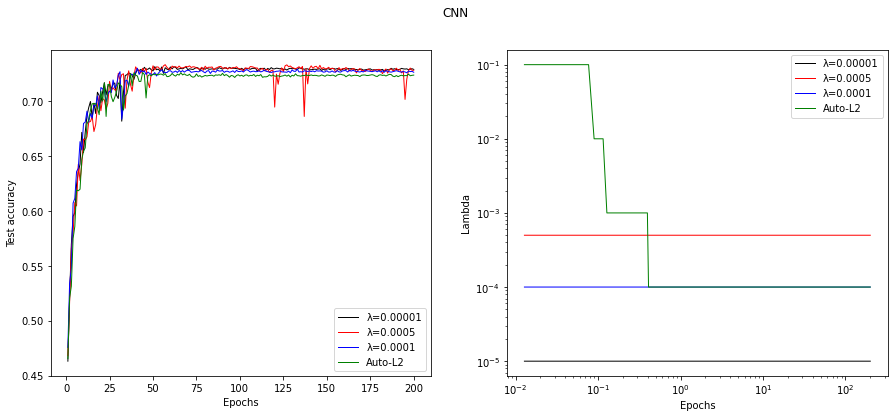

In [104]:
legend = ["λ=0.00001" ,"λ=0.0005", "λ=0.0001", "Auto-L2"]
plot_acc_and_lambda(df1, df2, df3, df4, 'CNN', legend, batch_num)

# Original setup in paper - CNN with Batch Normalization

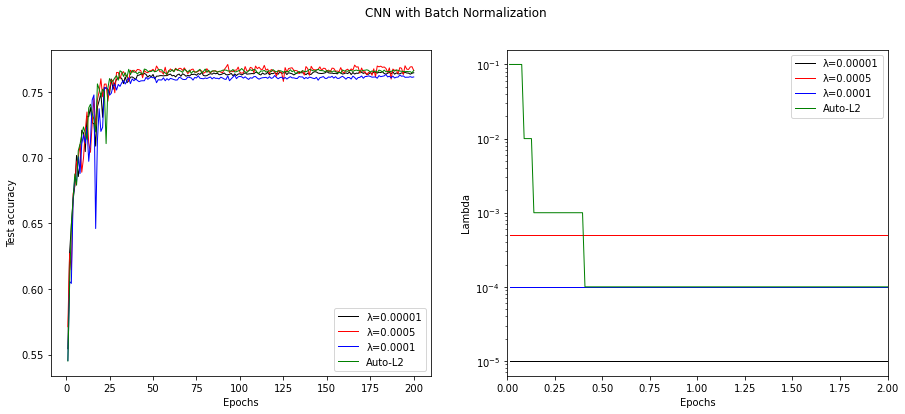

In [95]:
legend = ["λ=0.00001" ,"λ=0.0005", "λ=0.0001", "Auto-L2"]
plot_acc_and_lambda(bn_df1, bn_df2, bn_df3, bn_df4, 'CNN with Batch Normalization', legend, batch_num)

# Add percentage threshold into Auto L2

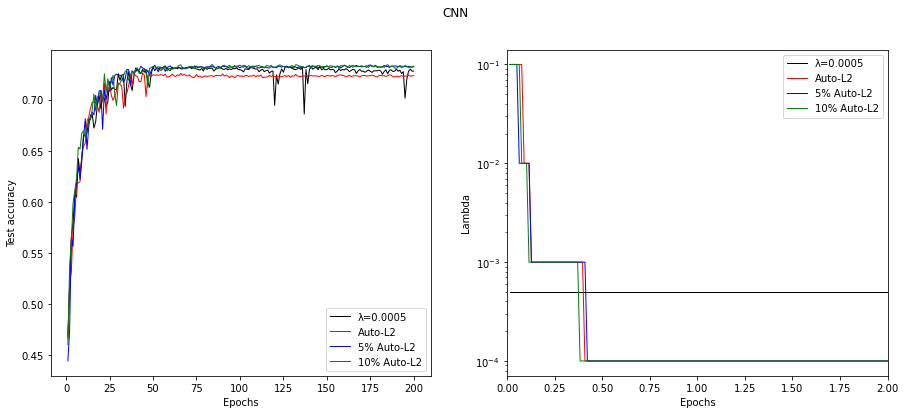

In [96]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "10% Auto-L2"]
plot_acc_and_lambda(df2, df4, pct5_df1, pct10_df1, 'CNN', legend, batch_num)

# Add percentage threshold into Auto L2 (with Batch Normalization)

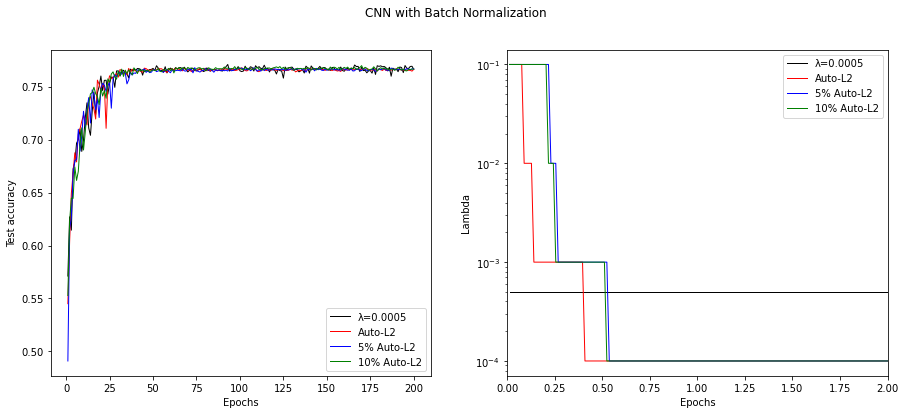

In [98]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "10% Auto-L2"]
plot_acc_and_lambda(bn_df2, bn_df4, pct5_df2, pct10_df2, 'CNN with Batch Normalization', legend, batch_num)

# Advance L2

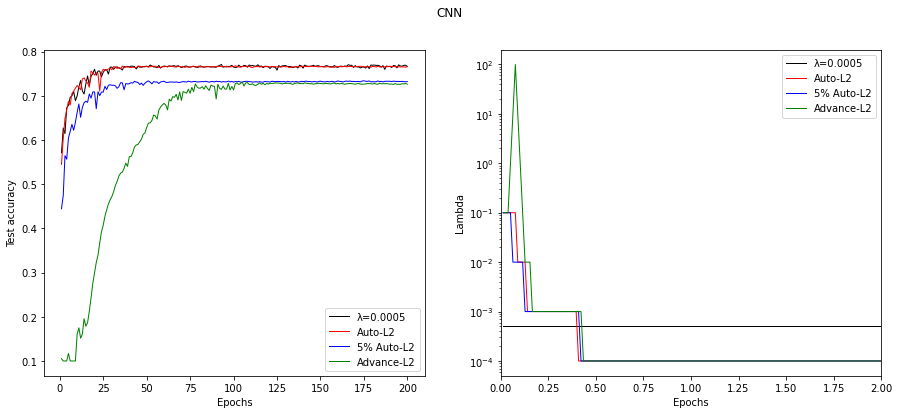

In [99]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "Advance-L2"]
plot_acc_and_lambda(bn_df2, bn_df4, pct5_df1, adv_df1, 'CNN', legend, batch_num)

# Advance L2 (with Batch Normalization)

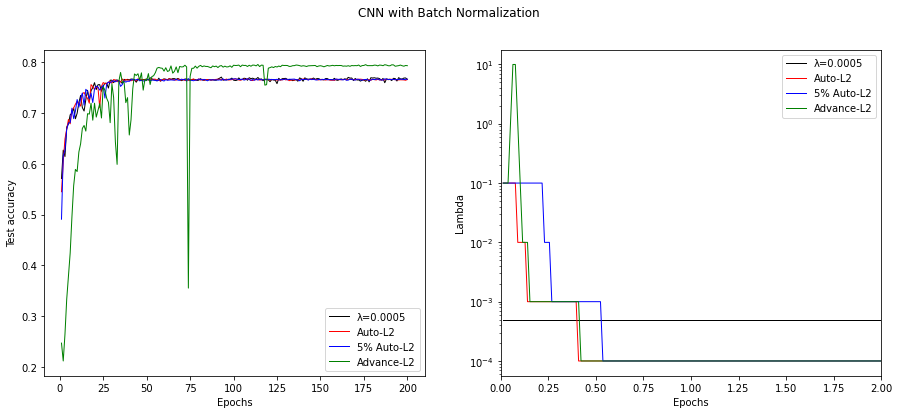

In [100]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "Advance-L2"]
plot_acc_and_lambda(bn_df2, bn_df4, pct5_df2, adv_df2, 'CNN with Batch Normalization', legend, batch_num)